# First measurements of both sensors

### import relevant modules

In [74]:
import DA_functions as da
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as md
import seaborn as sb

%matplotlib inline 
# %matplotlib notebook
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')

### set path and choose time of measurement

In [76]:
dataPath = '/Users/iditbela/Dropbox/'
start_date = datetime.datetime(2018, 9, 26, 0, 0, 0)
end_date = datetime.datetime(2018, 10, 2, 0, 0, 0)
duration = 10 # measurement duration

# SENSOR-1-SDS021

In [77]:
sensor_no = 1
output_no = 2
times_1, data_1 = da.getSignalData(dataPath, sensor_no,start_date, end_date, duration, output_no)

In [78]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

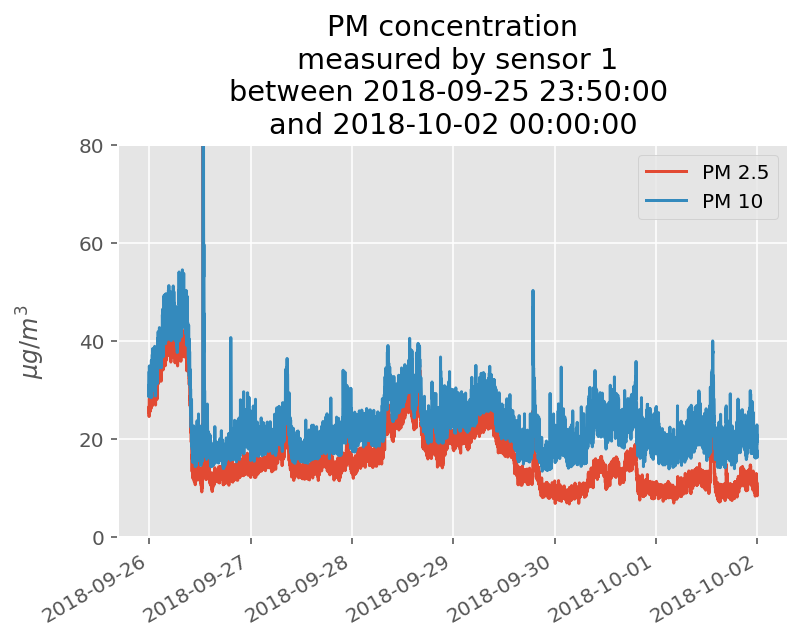

In [79]:
# plot signal SENSOR-1-SDS021
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')

fmt = "%Y-%m-%d %H:%M:%S"
fig, ax = plt.subplots()
ax.plot(times_1, data_1[:,0])
ax.plot(times_1,data_1[:,1])
ax.set_ylim(0,80)
ax.xaxis.set_major_formatter(md.DateFormatter("%Y-%m-%d"))
ax.legend(('PM 2.5','PM 10'),loc='upper right')
plt.title('PM concentration\n measured by sensor '+str(sensor_no)+'\nbetween '+times_1[0].strftime(fmt)+' \nand '+ (times_1[len(times_1)-1]+datetime.timedelta(hours=0, minutes=1)).strftime(fmt))
plt.ylabel(r'$\mu g/m^3$',labelpad=16)
# Tell matplotlib to interpret the x-axis values as dates
ax.xaxis_date()
# Make space for and rotate the x-axis tick labels
fig.autofmt_xdate()
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] = 20
plt.show();

In [80]:
plt.close('all')
plt.rcParams.update(plt.rcParamsDefault)

# SENSOR-2-PMS5003

In [85]:
sensor_no = 2
output_no = 12
times_2, data_2 = da.getSignalData(dataPath, sensor_no,start_date, end_date, duration, output_no)

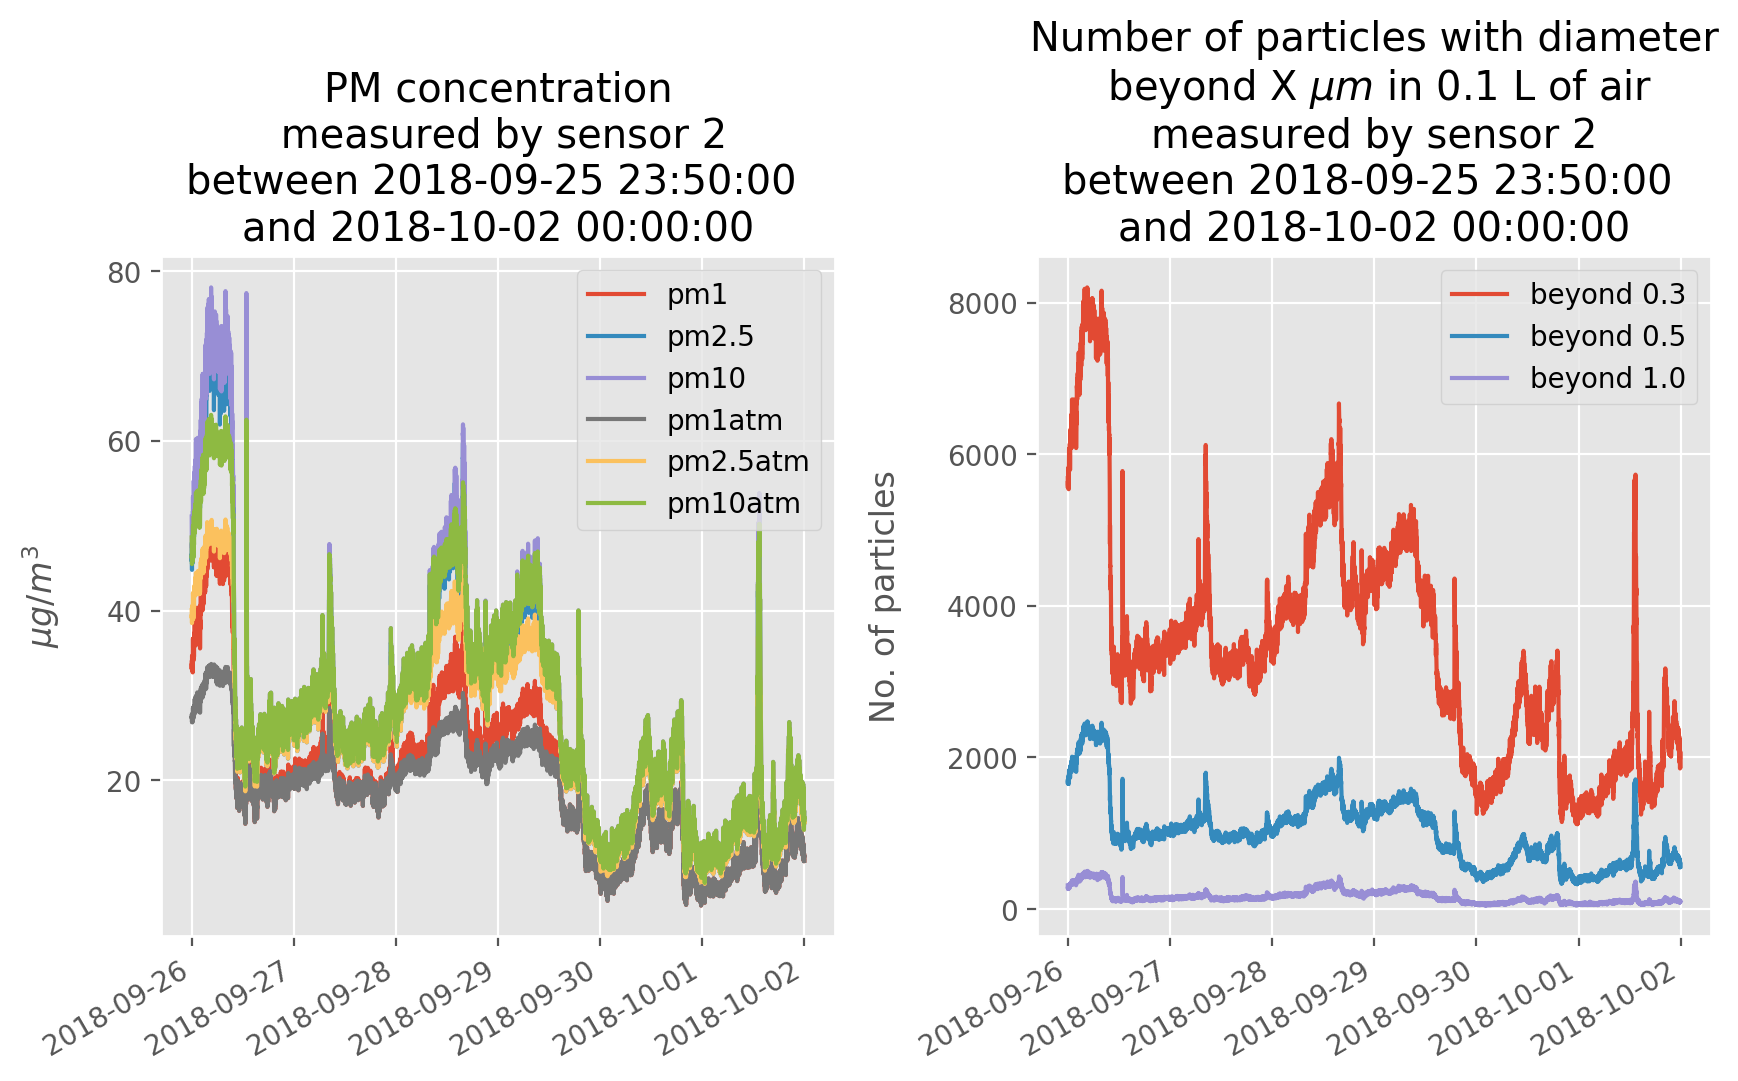

In [87]:
# plot signal SENSOR-2-PMS5003
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')

fmt = "%Y-%m-%d %H:%M:%S"
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.subplots_adjust(hspace=0.1, wspace=0.3)

# plot PM
for i in range(6):
    ax[0].plot(times_2, data_2[:,i])
ax[0].xaxis.set_major_formatter(md.DateFormatter("%Y-%m-%d"))
# plot concentration
ax[0].legend(('pm1', 'pm2.5', 'pm10', 'pm1atm', 'pm2.5atm', 'pm10atm'),loc='upper right')
# plt.title('PM concentration\n measured by sensor '+str(sensor_no)+'\nbetween '+times_2[0].strftime(fmt)+' and '+ (times_2[len(times_2)-1]+datetime.timedelta(hours=0, minutes=1)).strftime(fmt))
ax[0].set_title('PM concentration\n measured by sensor '+str(sensor_no)+'\nbetween '+times_2[0].strftime(fmt)+' \nand '+ (times_2[len(times_2)-1]+datetime.timedelta(hours=0, minutes=1)).strftime(fmt))
ax[0].set_ylabel(r'$\mu g/m^3$',labelpad=16)
# Tell matplotlib to interpret the x-axis values as dates
ax[0].xaxis_date()
# Make space for and rotate the x-axis tick labels
fig.autofmt_xdate()

# plot No. of particles
for i in range(3):
    ax[1].plot(times_2, data_2[:,6+i])
ax[1].xaxis.set_major_formatter(md.DateFormatter("%Y-%m-%d"))
# plot concentration
ax[1].legend(('beyond 0.3', 'beyond 0.5', 'beyond 1.0'),loc='upper right')
# plt.title('PM concentration\n measured by sensor '+str(sensor_no)+'\nbetween '+times_2[0].strftime(fmt)+' and '+ (times_2[len(times_2)-1]+datetime.timedelta(hours=0, minutes=1)).strftime(fmt))
ax[1].set_title('Number of particles with diameter\n beyond X '+ r'$\mu m$ ' + 'in 0.1 L of air\n' + 'measured by sensor ' +str(sensor_no)+'\nbetween '+times_2[0].strftime(fmt)+' \nand '+ (times_2[len(times_2)-1]+datetime.timedelta(hours=0, minutes=1)).strftime(fmt))
ax[1].set_ylabel('No. of particles',labelpad=16)
# Tell matplotlib to interpret the x-axis values as dates
ax[1].xaxis_date()
# Make space for and rotate the x-axis tick labels
fig.autofmt_xdate()


plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] = 16
plt.show();

In [88]:
plt.close('all')
plt.rcParams.update(plt.rcParamsDefault)

# Comparing signal between both sensors

## Plot signals in time - PM 2.5 and PM 10

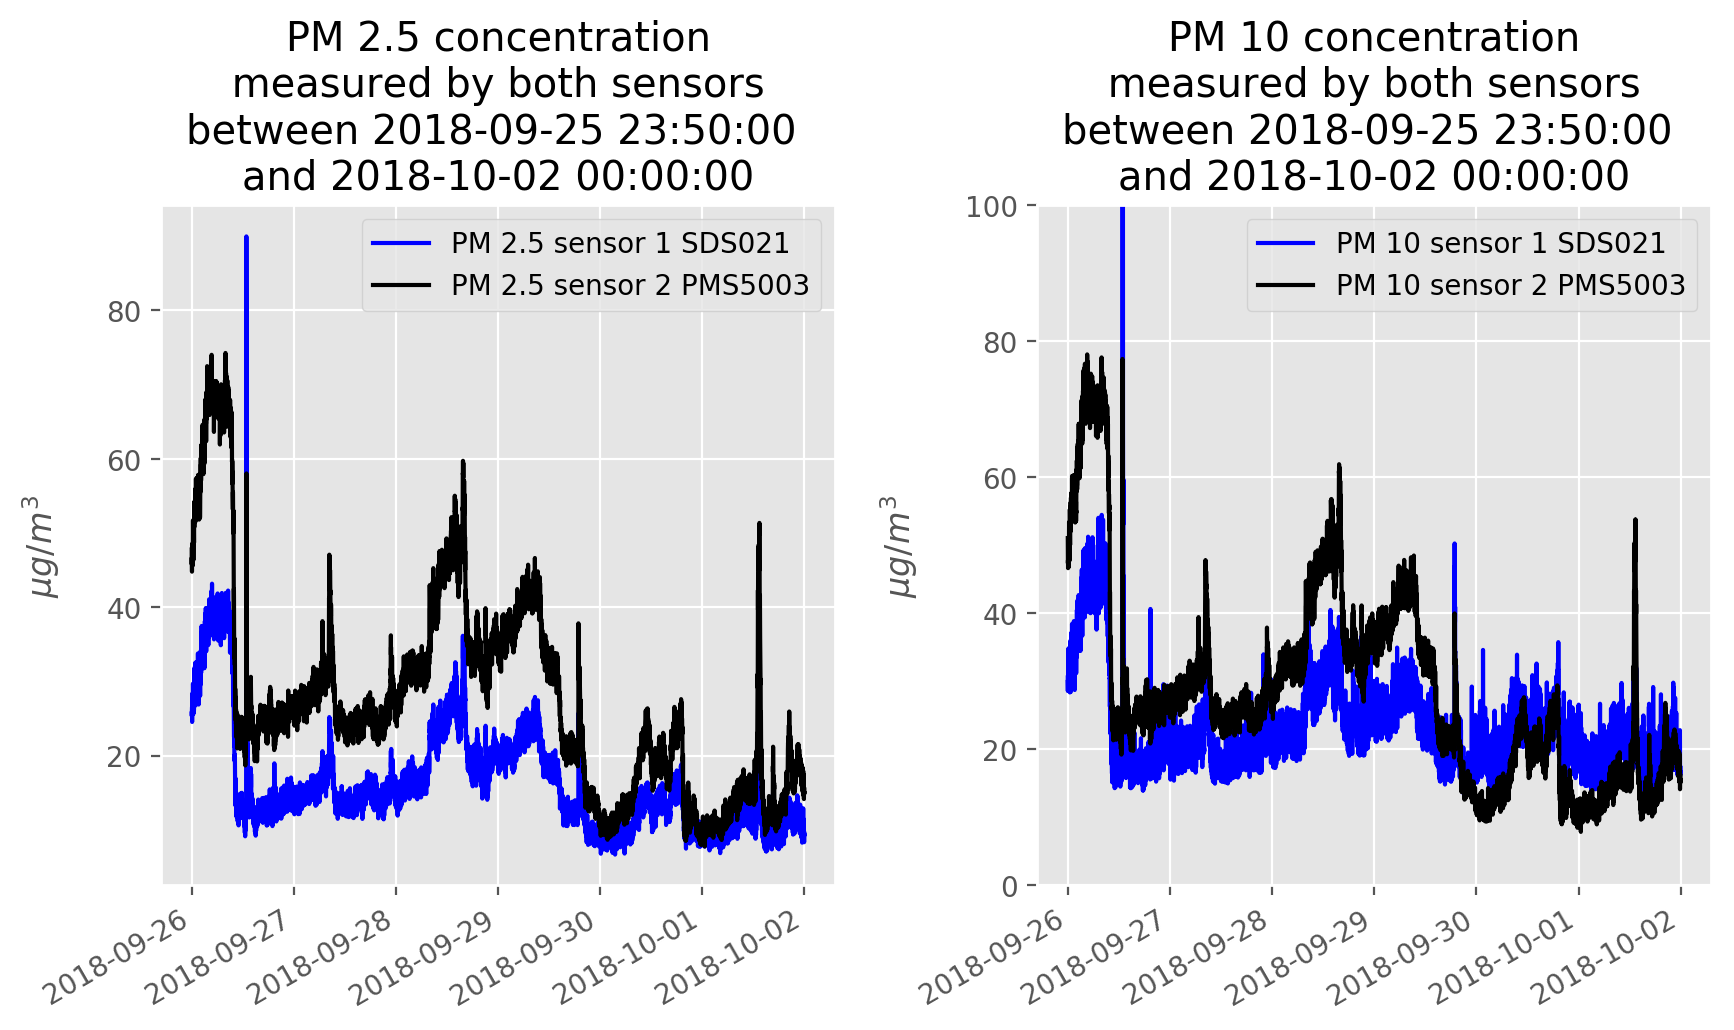

In [43]:
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')

fig, ax = plt.subplots(nrows=1, ncols=2)
fig.subplots_adjust(hspace=0.1, wspace=0.3)

# PM 2.5
ax[0].plot(times_1, data_1[:,0],'b')
ax[0].plot(times_2,data_2[:,1],'k')
ax[0].legend(('PM 2.5 sensor 1 SDS021','PM 2.5 sensor 2 PMS5003'),loc='upper right')
ax[0].xaxis.set_major_formatter(md.DateFormatter("%Y-%m-%d"))
# Tell matplotlib to interpret the x-axis values as dates
ax[0].xaxis_date()
ax[0].set_title('PM 2.5 concentration\n measured by both sensors '+'\nbetween '+times_1[0].strftime(fmt)+' \nand '+ (times_1[len(times_1)-1]+datetime.timedelta(hours=0, minutes=1)).strftime(fmt))
ax[0].set_ylabel(r'$\mu g/m^3$',labelpad=16)

# PM 10
ax[1].plot(times_1, data_1[:,1],'b')
ax[1].plot(times_2,data_2[:,2],'k')
ax[1].legend(('PM 10 sensor 1 SDS021','PM 10 sensor 2 PMS5003'),loc='upper right')
ax[1].xaxis.set_major_formatter(md.DateFormatter("%Y-%m-%d"))
# Tell matplotlib to interpret the x-axis values as dates
ax[1].xaxis_date()
ax[1].set_title('PM 10 concentration\n measured by both sensors '+'\nbetween '+times_1[0].strftime(fmt)+' \nand '+ (times_1[len(times_1)-1]+datetime.timedelta(hours=0, minutes=1)).strftime(fmt))
ax[1].set_ylabel(r'$\mu g/m^3$',labelpad=16)
ax[1].set_ylim([0,100]) # cut the y to see better

# Make space for and rotate the x-axis tick labels
fig.autofmt_xdate()
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] = 16
plt.show();

In [32]:
plt.close('all')
plt.rcParams.update(plt.rcParamsDefault)

## Correlation between signals - PM 2.5 and PM 10

### (1) Scatter plot of signal-Vs.-signal 

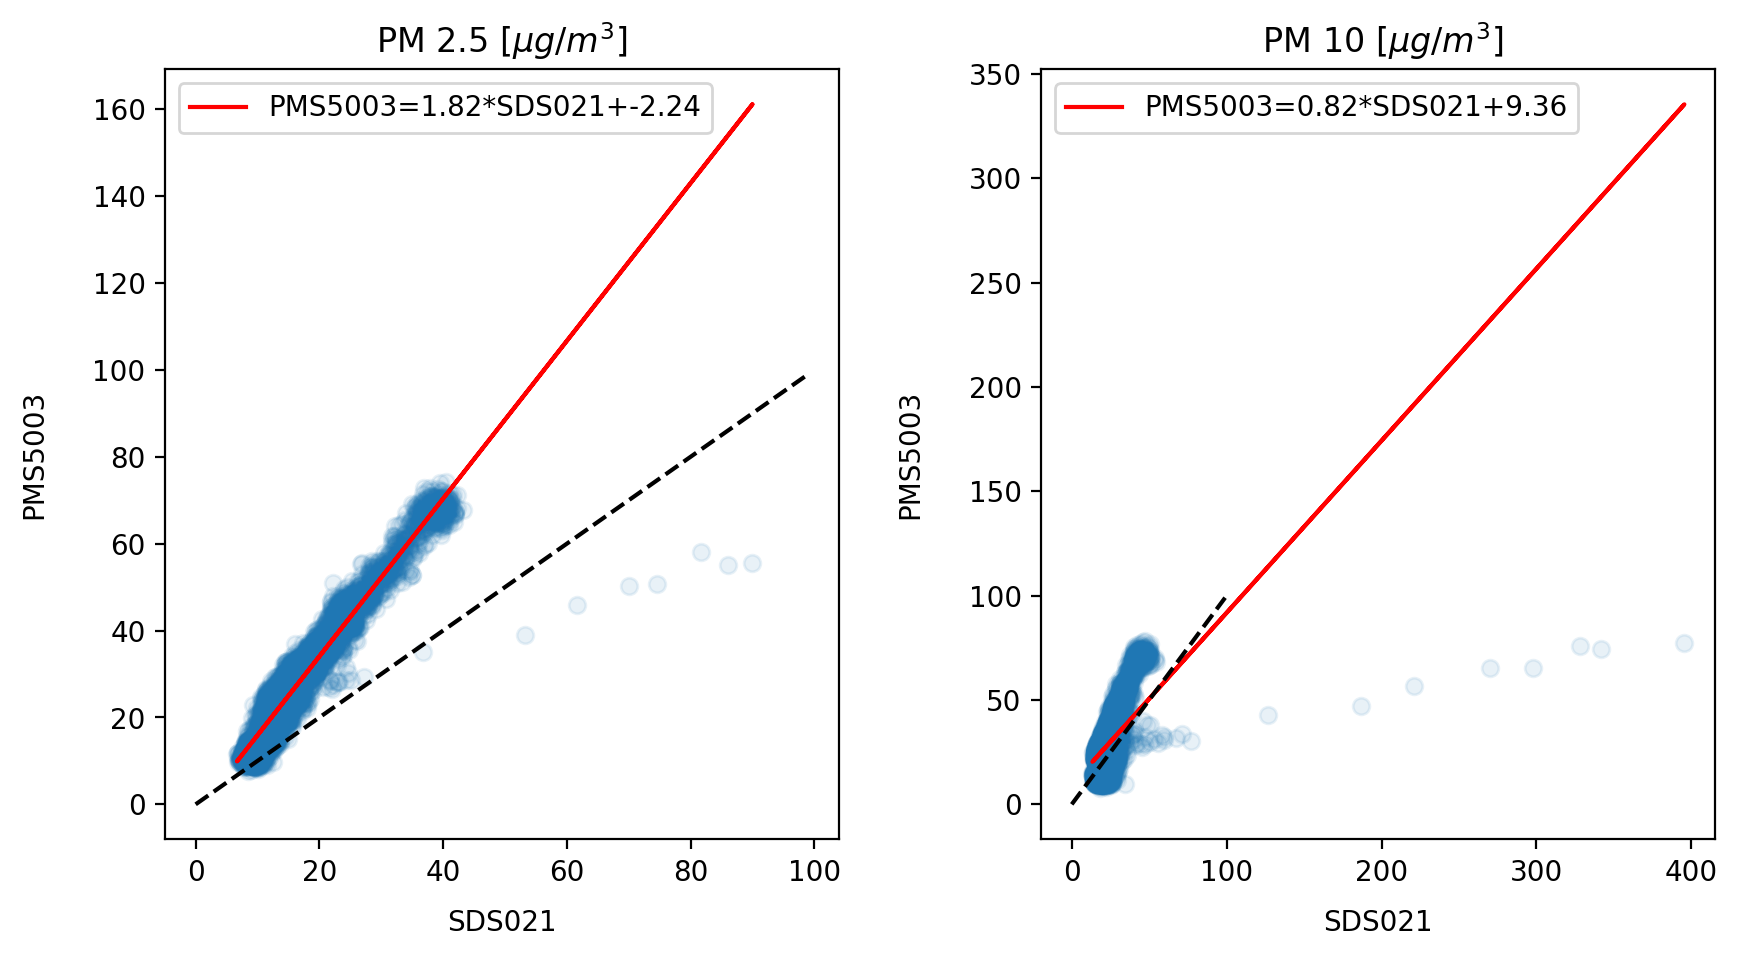

In [52]:
# scatter plot of signal Vs. signal 
from scipy import stats
%config InlineBackend.figure_format = 'retina'
# plt.style.use('ggplot')

t = ['PM 2.5 ' + r'$[\mu g/m^3]$',' PM 10 ' + r'$[\mu g/m^3]$']

fig = plt.figure()
fig.subplots_adjust(hspace=0.1, wspace=0.3)
for i in range(1, 3):
    ax = fig.add_subplot(1, 2, i)
    plt.scatter(data_1[:,i-1], data_2[:,i], alpha=0.1)
    plt.rcParams['figure.figsize'] = (10, 5)
    plt.title(t[i-1])
    plt.ylabel('PMS5003',labelpad=16)
    plt.xlabel('SDS021',labelpad=8)
#     plt.ylim([0,100]) #set y lim to see better
#     plt.xlim([0,100]) #set x lim to see better
    #regression part
    slope, intercept, r_value, p_value, std_err = stats.linregress(data_1[:,i-1],data_2[:,i])
    line = slope*data_1[:,i-1]+intercept
    plt.plot(data_1[:,i-1],line,'r',label='PMS5003={:.2f}*SDS021+{:.2f}'.format(slope,intercept))
    plt.legend(fontsize=10)
    # plot a reference
    plt.plot(np.arange(0,100),np.arange(0,100),'--k')    

plt.show();


It looks like the PMS5003 is overestimating compared to SDS021 (or SDS021 is underestimating). This is seen mainly in PM 2.5, while in PM 10 I would guess the exreme values of SDS021 are strongly influencing the fit. 

In [48]:
plt.close('all')
plt.rcParams.update(plt.rcParamsDefault)

### (2) Residuals - substruct two signals and plot in time - sensor SDS021 MINUS sensor PMS5003 

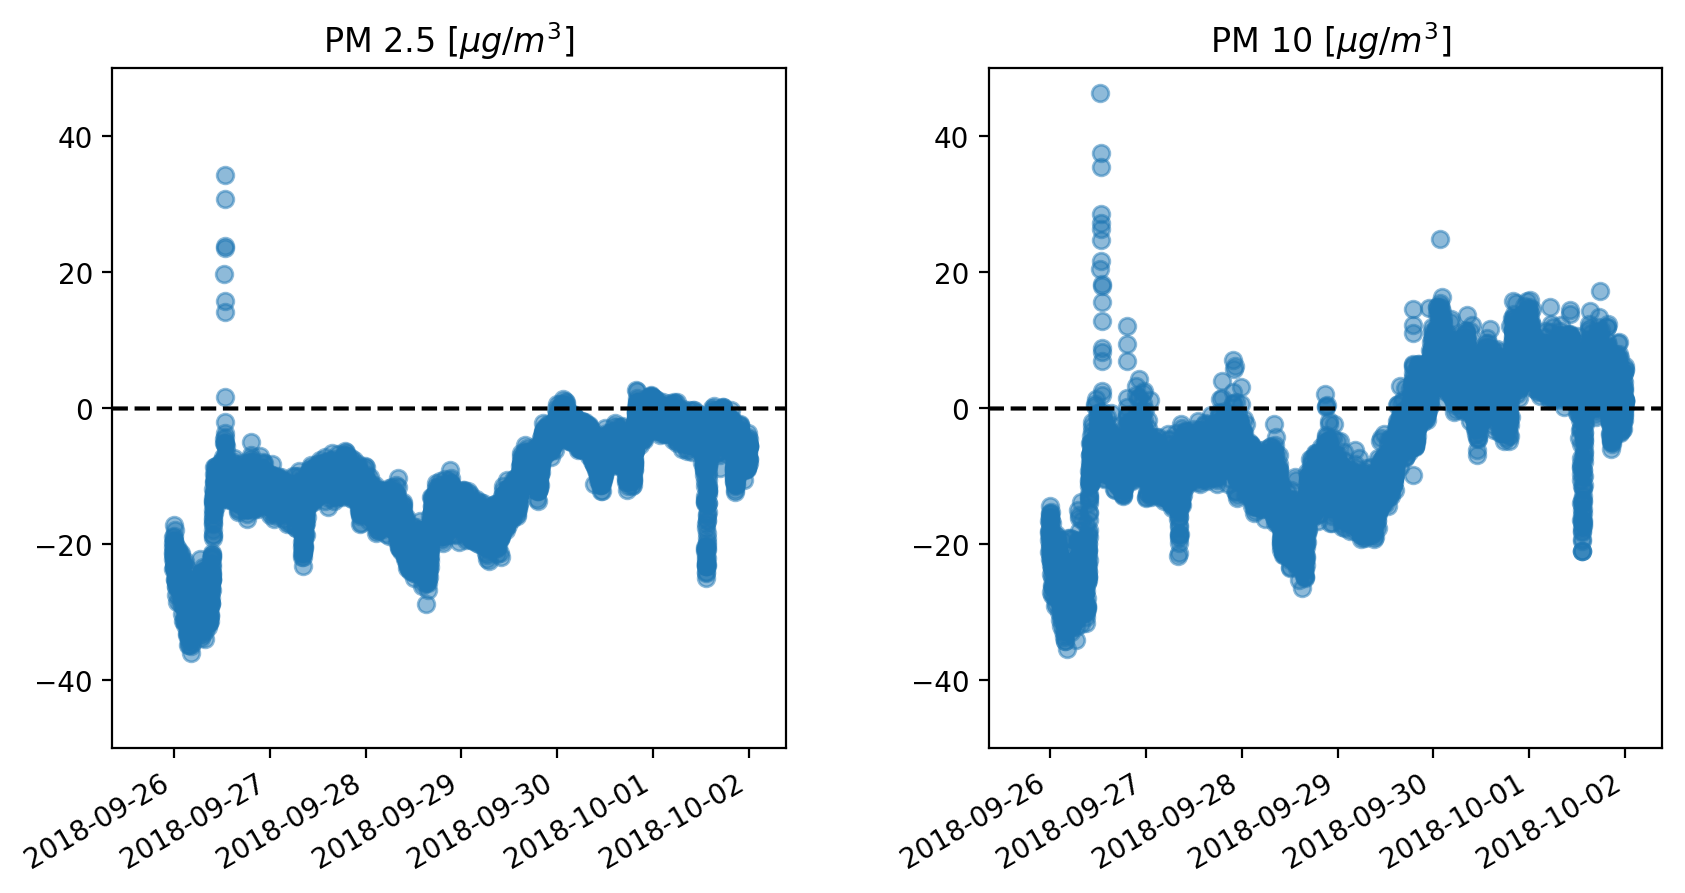

In [83]:
%config InlineBackend.figure_format = 'retina'
# plt.style.use('ggplot')

t = ['PM 2.5 ' + r'$[\mu g/m^3]$',' PM 10 ' + r'$[\mu g/m^3]$']
# get times for residuals
s = datetime.datetime(2018, 9, 26, 0, 0, 0)-datetime.timedelta(days = 1)
e = datetime.datetime(2018, 10, 2, 0, 0, 0)+datetime.timedelta(days = 1)
sensor_no = 1
output_no = 2
t_res, _ = da.getSignalData(dataPath, sensor_no,s, e, duration, output_no)

fig = plt.figure()
fig.subplots_adjust(hspace=0.1, wspace=0.3)
for i in range(1, 3):
    ax = fig.add_subplot(1, 2, i)
    plt.scatter(times_1,data_1[:,i-1]-data_2[:,i], alpha=0.5)
    plt.rcParams['figure.figsize'] = (10, 5)
    plt.title(t[i-1])
    fig.autofmt_xdate()
    ax.xaxis.set_major_formatter(md.DateFormatter("%Y-%m-%d"))
    plt.xlim([t_res[0],t_res[-1]])
    plt.ylim([-50,50])
    plt.plot(t_res,np.zeros((len(t_res))),'--k')         
plt.show();


Here again it is clear that most of the time PMS5003 is over-estimating (alternatively SDS021 is under-estimating). At the last two days of measurements, the trend seems to switch for the PM 10 values. 

In [89]:
plt.close('all')
plt.rcParams.update(plt.rcParamsDefault)

### Cross-correlation between signals 

In [118]:
t = ['PM 2.5','PM 10']

# the equivalence of np.corrcoef(data_1[:,i-1], data_2[:,i])
# normalized cross-correlation 
def pearson(a, b):
    # Length.
    n = len(a)
    # Means.
    ma = sum(a) / n
    mb = sum(b) / n
    # Shifted samples.
    _ama = a - ma
    _bmb = b - mb
    # Standard deviations.
    sa = np.sqrt(np.dot(_ama, _ama) / n)
    sb = np.sqrt(np.dot(_bmb, _bmb) / n)
    # Covariation.
    cov = np.dot(_ama, _bmb) / n
    # Final formula.
    # Note: division by `n` in deviations and covariation cancel out each other in
    #       final formula and could be ignored.
    return cov / (sa * sb)

# the equivalence of plt.xcorr(data_1[:,i-1], data_2[:,i],normed=True, maxlags=1) #maxlags=1 is zero lag
# not normalized cross-correlation
def cross0lag(a, b):
    return np.dot(a, b) / np.sqrt(np.dot(a, a) * np.dot(b, b))

for i in range(1, 3):
    pearson_coeff = pearson(data_1[:,i-1], data_2[:,i])
    cross_coeff = cross0lag(data_1[:,i-1], data_2[:,i])
    print('Manually calculated coefficients for ' + t[i-1]+":")
    print(t[i-1] +' Pearson =', pearson_coeff)
    print(t[i-1] +' Cross =', cross_coeff, "\n")
    

Manually calculated coefficients for PM 2.5:
PM 2.5 Pearson = 0.9578479382206851
PM 2.5 Cross = 0.991065081433912 

Manually calculated coefficients for PM 10:
PM 10 Pearson = 0.5927918988909372
PM 10 Cross = 0.9238460875063983 



In [18]:
# compare cross-correlation (Pearson) for different averaging intervals
# get average signals


# My mac address exposure

## from sensor-1

In [19]:
myMacAdd = 'AC:5F:3E:69:0D:7A'
sensor_no = 1
output_no = 2
seq1 = da.getSignalPerMacAddress(dataPath,sensor_no,start_date,end_date,myMacAdd,output_no,duration)

## from sensor-2

In [20]:
sensor_no = 2
output_no = 12
seq2 = da.getSignalPerMacAddress(dataPath,sensor_no,start_date,end_date,myMacAdd,output_no,duration)

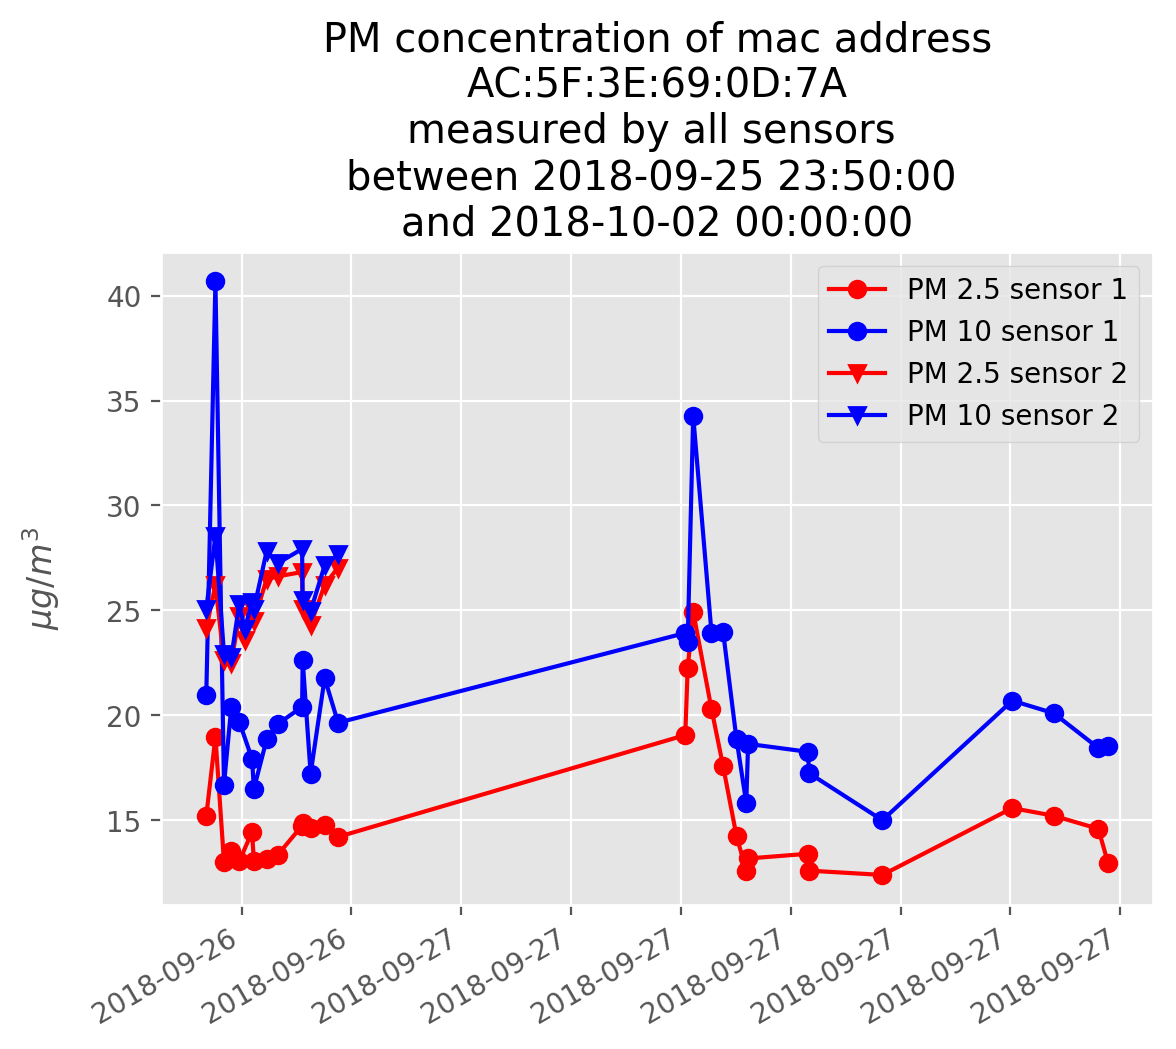

In [21]:
# plot PM2.5 and PM10 from "all" sensors on the same plot 
# plot signal SENSOR-2-PMS5003
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')

fmt = "%Y-%m-%d %H:%M:%S"
fig, ax = plt.subplots()

colors = ['r','b']
markers = ['o','v']
# plot PM seq-1
ax.plot(seq1[:,0], seq1[:,3],marker = markers[0],color = colors[0], label='PM 2.5 sensor 1')
ax.plot(seq1[:,0], seq1[:,4],marker = markers[0],color = colors[1], label='PM 10 sensor 1')

# plot PM seq-2
ax.plot(seq2[:,0], seq2[:,4],marker = markers[1],color = colors[0], label='PM 2.5 sensor 2')
ax.plot(seq2[:,0], seq2[:,5],marker = markers[1],color = colors[1], label='PM 10 sensor 2')

# ax.set_xlim('2018-09-26 16:00:00','2018-09-27 23:00:00')

ax.xaxis.set_major_formatter(md.DateFormatter("%Y-%m-%d"))

ax.legend(loc='upper right')

plt.title('PM concentration of mac address\n' + myMacAdd + '\nmeasured by all sensors '+'\nbetween '+times_1[0].strftime(fmt)+' \nand '+ (times_1[len(times_1)-1]+datetime.timedelta(hours=0, minutes=1)).strftime(fmt))
plt.ylabel(r'$\mu g/m^3$',labelpad=16)
# Tell matplotlib to interpret the x-axis values as dates
ax.xaxis_date()
# Make space for and rotate the x-axis tick labels
fig.autofmt_xdate()


plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] = 16
plt.show();

In [53]:
plt.close('all')
plt.rcParams.update(plt.rcParamsDefault)

# Particle distributions

## Number of particles 

In [56]:
import pandas as pd
# %config InlineBackend.figure_format = 'retina'
# plt.style.use('ggplot');

# no03, no05, no1, no25, no5, no10
# data represents number of particles between 0.3-0.5, 0.5-1, 1-2.5,2.5-5,5-10 micrometer. 
particles = data_2[:,6:11] - data_2[:,7:12] 
bins = ['0.3-0.5 '+r'$\mu m$','0.5-1.0 '+r'$\mu m$', '1.0-2.5 '+r'$\mu m$', '2.5-5.0 '+r'$\mu m$', '5.0-10.0 '+r'$\mu m$']
x = np.arange(5)
y=np.mean(particles,axis=0)

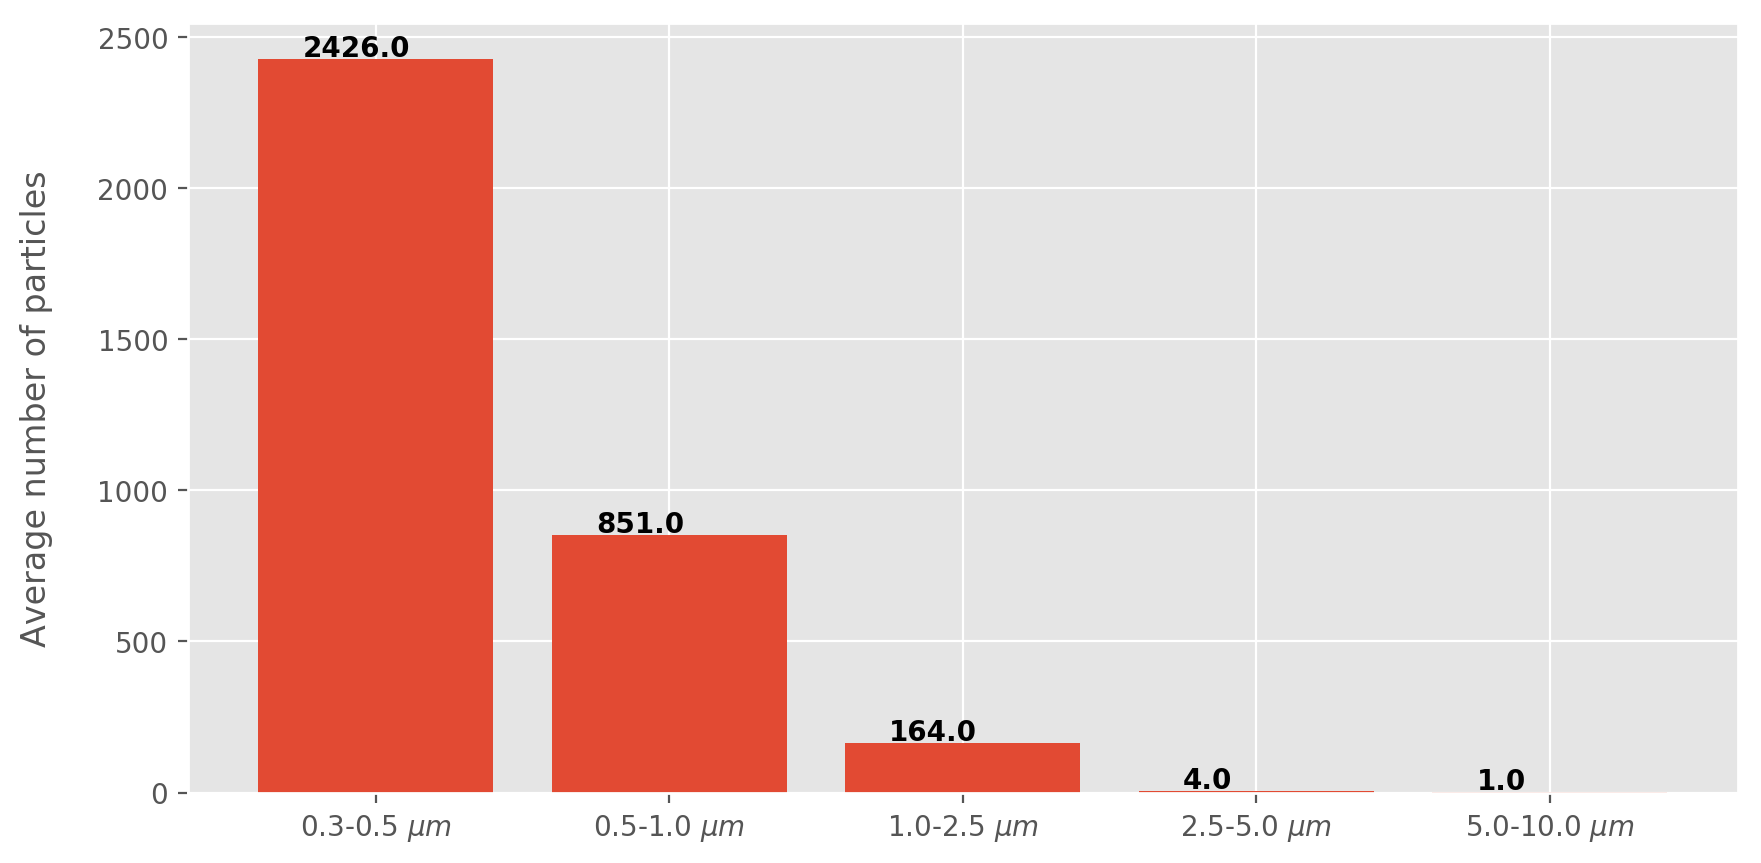

In [118]:
# make a bar plot of the mean number of particles in each category
fig, ax = plt.subplots()

plt.bar(x,y)
ax.set_xticks(np.arange(len(bins)))
ax.set_xticklabels(bins)
plt.ylabel('Average number of particles',labelpad=16)
y_int = np.round(y)

for i, v in enumerate(y_int):
    ax.text(i-0.25, v+10, str(y_int[i]), color='k',fontweight='bold')
plt.show();

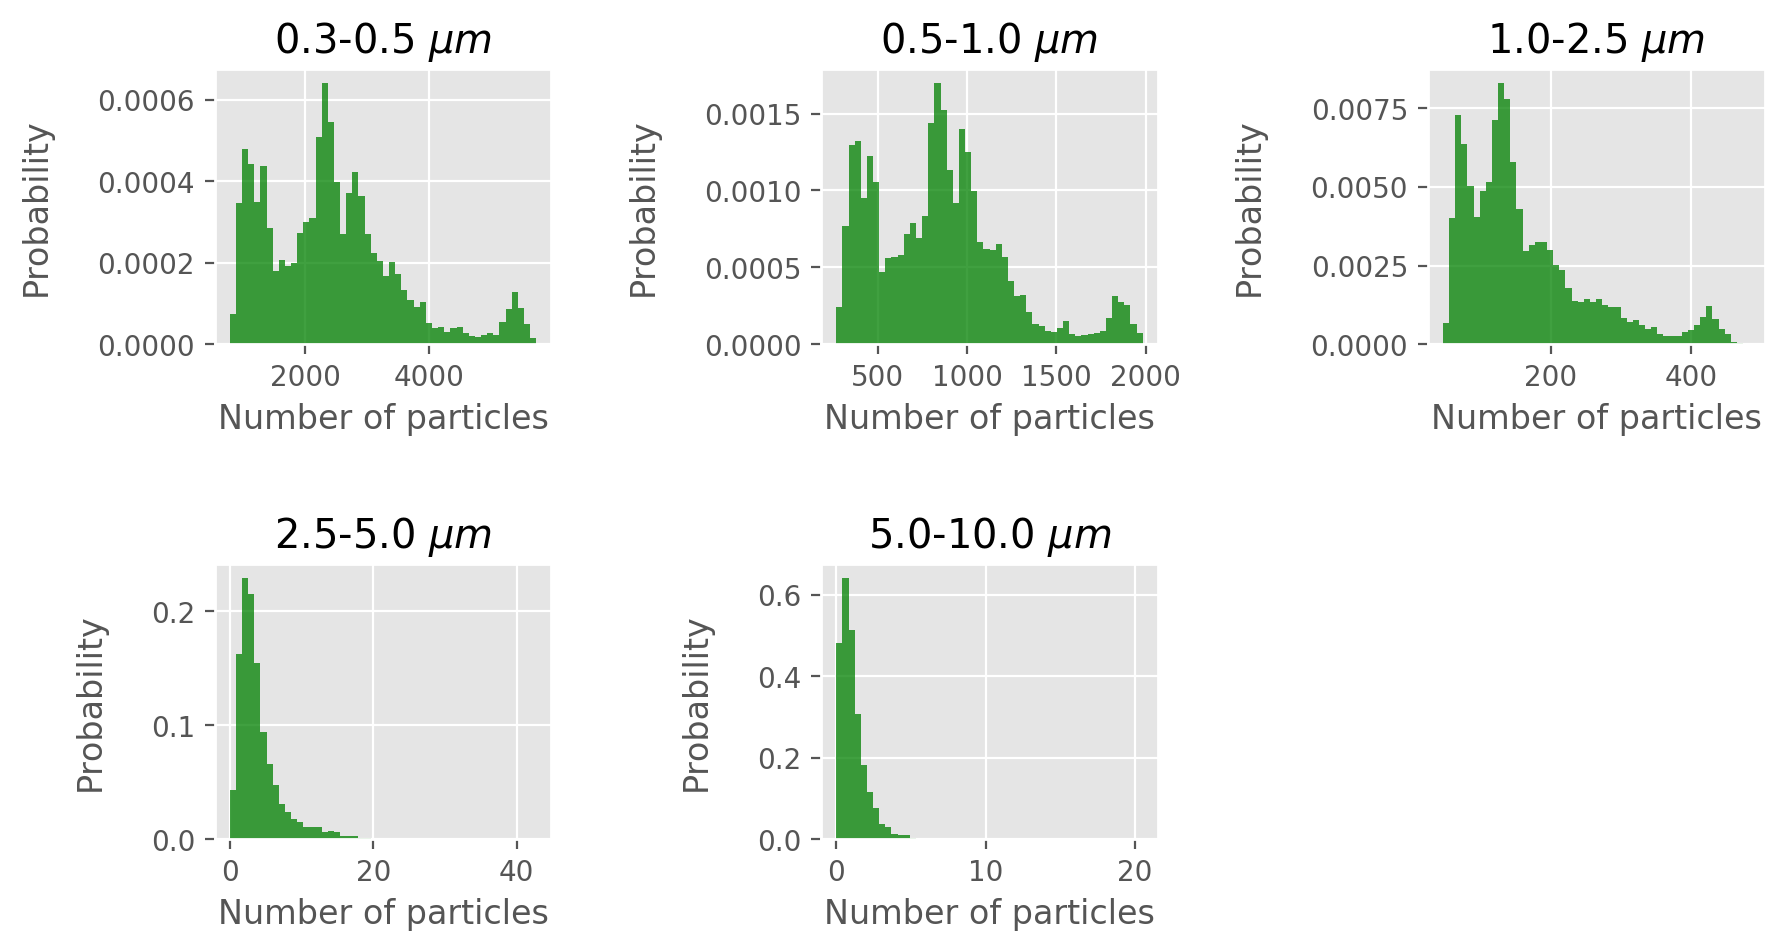

In [190]:
# make a hist plot for each bin size, showing the probability of number of particles. 
# This indicates my patterns of exposure during the time of measurement. 

%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')

fig = plt.figure()
fig.subplots_adjust(hspace=0.8, wspace=0.8)
for i in range(1, 6):
    ax = fig.add_subplot(2, 3, i)
    plt.hist(particles[:,i-1], 50, density=True, facecolor='g', alpha=0.75)
    plt.rcParams['figure.figsize'] = (10, 5)
    plt.title(bins[i-1])
    plt.ylabel('Probability',labelpad=16)
    plt.xlabel('Number of particles')

plt.show();

## PM concentration

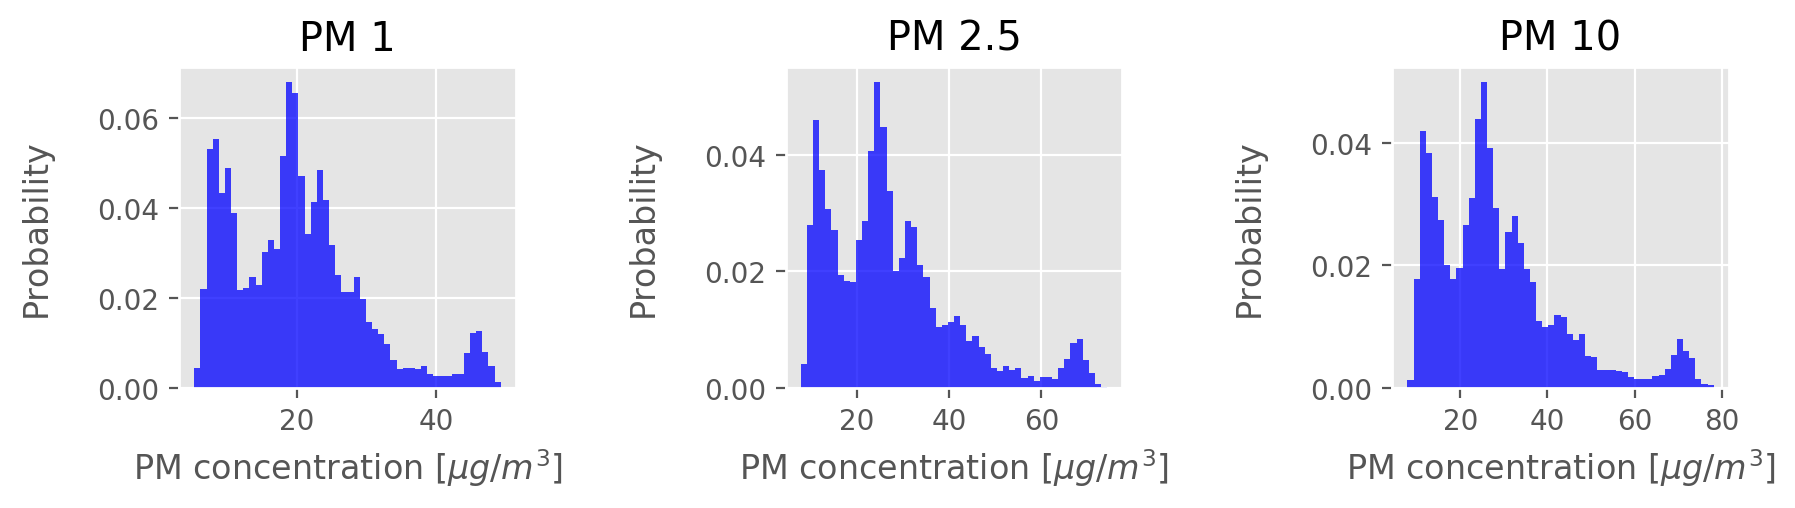

In [114]:
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')

t = ['PM 1','PM 2.5', 'PM 10']

fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.8)
for i in range(1, 4):
    ax = fig.add_subplot(2, 3, i)
    plt.hist(data_2[:,i-1], 50, density=True, facecolor='b', alpha=0.75)
    plt.rcParams['figure.figsize'] = (10, 5)
    plt.title(t[i-1])
    plt.ylabel('Probability',labelpad=16)
    plt.xlabel('PM concentration '+r'$[\mu g/m^3]$')

plt.show();

# Zoey's measurements  - Calibration 

Compare measured data from Atzmaut station and SDS021 + PMS5003 + Met-one-804 sensors placed between 10.6 08:00 and 19.6 07:00

## Atzmaus data - is it 07/06 - 16/06 ?

Load AQS data and clean

In [116]:
import pandas as pd

df = pd.read_excel('StationDataAtzmaut.xlsx')
df['PM2.5'] = pd.to_numeric(df['PM2.5'], errors='coerce')
# remove weird data at the end
df.drop(df.loc[2869:,:].index, inplace=True)

# change the date to a normal format based on df.loc[0,'date'] and df.loc[len(df)-1,'date']
df.date = pd.date_range(start='06/10/2018',end='06/19/2018 23:00:00',freq='5min')

# reset index
df.reset_index(drop=True, inplace=True)

# now take rows between 10.6.2018 08:00 and 19.6.2018 07:00
mask = (df.date < "2018-06-10 08:00") | (df.date > "2018-06-19 07:00")
df.drop(df.loc[mask,:].index, inplace=True)

# reset index 
df.reset_index(drop=True, inplace=True)

# change negative values to NaN
df['PM2.5'] = np.where(df['PM2.5'] < 0, np.NaN , df['PM2.5'])


In [117]:
df.head()
df.tail()

,PM2.5,date
0,22.0,2018-06-10 08:00:00
1,22.1,2018-06-10 08:05:00
2,23.7,2018-06-10 08:10:00
3,25.2,2018-06-10 08:15:00
4,25.9,2018-06-10 08:20:00


,PM2.5,date
2576,NaN,2018-06-19 06:40:00
2577,0.1,2018-06-19 06:45:00
2578,3.4,2018-06-19 06:50:00
2579,6.4,2018-06-19 06:55:00
2580,8.3,2018-06-19 07:00:00


## MET-ONE data 

In [ ]:
# missing ?

## Sensors data

# Our cool experiment - putting the sensors in a fume hood